# Data preprocessing for Seq2Seq modelling

In this notebook the cleaned data is going to be preprocessed and prepared for being used in a seq2seq model. For this purpose we are going to:

- read in the cleaned data 
- check for any latin characters
- remove and replace latin characters with their corresponing Georgian ones
- create a list of Georgian characters 
- create a iist of special tokens (padding, bos, eos)
- create a list of tags
- create a dictionary of chars, special tokens and tags for tokenization
- tokenize the features and target values seperately
- save the tokenized data for processing

## Reading in Data and creating a vocabulary for the chars, tags and special tokens

In [1]:
# import necessary libraries
import pandas as pd

In [2]:
# read in the feature data
um_features = pd.read_csv(r"..\data\um_features.csv")
um_features.head()


,lemma,tag,lemma_length,form_length
0,შეუძლია,V;ARGNO1S;IND;PRS,7,8
1,შეუძლია,V;ARGNO2S;IND;PRS,7,8
2,შეუძლია,V;ARGNO3S;IND;PRS,7,7
3,შეუძლია,V;ARGNO1P;IND;PRS,7,9
4,შეუძლია,V;ARGNO2P;IND;PRS,7,9


In [3]:
# check shape of feature data
um_features.shape

(21054, 4)

In [4]:
# read in the target data
um_target = pd.read_csv(r"..\data\um_target.csv")
um_target.head()

,form
0,შემიძლია
1,შეგიძლია
2,შეუძლია
3,შეგვიძლია
4,შეგიძლიათ


In [5]:
# check shape of target data
um_target.shape

(21054, 1)

In [6]:
# make a list of Georgian chars
georgian_chars = [
    'ა', 'ბ', 'გ', 'დ', 'ე', 'ვ', 'ზ', 'თ', 'ი', 'კ', 'ლ', 'მ', 'ნ', 'ო', 'პ', 'ჟ', 'რ', 'ს', 'ტ', 'უ', 'ფ', 'ქ', 'ღ', 'ყ', 'შ', 'ჩ', 'ც', 'ძ', 'წ', 'ჭ', 'ხ', 'ჯ', 'ჰ'
    ]
# make a list of special chars
SPECIAL_TOKENS = ['<pad>', '<bos>', '<eos>']

In [7]:
# split the tags based on ;
um_features['tag'] = um_features['tag'].str.split(';')
um_features['tag'] = um_features['tag'].apply(lambda tags: [tag for tag in tags if tag != "V"])
um_features['tag']

0                  [ARGNO1S, IND, PRS]
1                  [ARGNO2S, IND, PRS]
2                  [ARGNO3S, IND, PRS]
3                  [ARGNO1P, IND, PRS]
4                  [ARGNO2P, IND, PRS]
                     ...              
21049    [ARGNO1P, ARGAC3P, SBJV, PRF]
21050    [ARGNO2P, ARGAC3P, SBJV, PRF]
21051    [ARGNO3P, ARGAC3P, SBJV, PRF]
21052                    [V.MSDR, PRF]
21053                   [V.MSDR, IPFV]
Name: tag, Length: 21054, dtype: object

In [8]:
# make a list of all tags
all_tags = []
for tags in um_features['tag']:
    all_tags.extend(tags)
all_tags
# remove duplicates from the list of tags
all_tags = list(set(all_tags))

In [9]:
# make a dict for target labels to get the output_dim later for the model
symbols = SPECIAL_TOKENS + georgian_chars  # Use the first two elements of SPECIAL_TOKENS
target_vocab_dict = {symbol: i for i, symbol in enumerate(symbols)}
target_vocab_dict
# store the target vocab dict for later use in the model notebook
%store target_vocab_dict 
target_vocab_dict


Stored 'target_vocab_dict' (dict)


{'<pad>': 0,
 '<bos>': 1,
 '<eos>': 2,
 'ა': 3,
 'ბ': 4,
 'გ': 5,
 'დ': 6,
 'ე': 7,
 'ვ': 8,
 'ზ': 9,
 'თ': 10,
 'ი': 11,
 'კ': 12,
 'ლ': 13,
 'მ': 14,
 'ნ': 15,
 'ო': 16,
 'პ': 17,
 'ჟ': 18,
 'რ': 19,
 'ს': 20,
 'ტ': 21,
 'უ': 22,
 'ფ': 23,
 'ქ': 24,
 'ღ': 25,
 'ყ': 26,
 'შ': 27,
 'ჩ': 28,
 'ც': 29,
 'ძ': 30,
 'წ': 31,
 'ჭ': 32,
 'ხ': 33,
 'ჯ': 34,
 'ჰ': 35}

In [10]:
# build one unified vocab for X
symbols = SPECIAL_TOKENS + sorted(georgian_chars) + sorted(all_tags)
feature_vocab_dict = {sym: idx for idx, sym in enumerate(symbols)}
feature_vocab_dict # we will use the length of this dict to get the input_dim later for the model
# store the feature vocab dict for later use in the model notebook
%store feature_vocab_dict 
feature_vocab_dict

Stored 'feature_vocab_dict' (dict)


{'<pad>': 0,
 '<bos>': 1,
 '<eos>': 2,
 'ა': 3,
 'ბ': 4,
 'გ': 5,
 'დ': 6,
 'ე': 7,
 'ვ': 8,
 'ზ': 9,
 'თ': 10,
 'ი': 11,
 'კ': 12,
 'ლ': 13,
 'მ': 14,
 'ნ': 15,
 'ო': 16,
 'პ': 17,
 'ჟ': 18,
 'რ': 19,
 'ს': 20,
 'ტ': 21,
 'უ': 22,
 'ფ': 23,
 'ქ': 24,
 'ღ': 25,
 'ყ': 26,
 'შ': 27,
 'ჩ': 28,
 'ც': 29,
 'ძ': 30,
 'წ': 31,
 'ჭ': 32,
 'ხ': 33,
 'ჯ': 34,
 'ჰ': 35,
 'ARGAC1P': 36,
 'ARGAC1S': 37,
 'ARGAC2P': 38,
 'ARGAC2S': 39,
 'ARGAC3P': 40,
 'ARGAC3S': 41,
 'ARGNO1P': 42,
 'ARGNO1S': 43,
 'ARGNO2P': 44,
 'ARGNO2S': 45,
 'ARGNO3P': 46,
 'ARGNO3S': 47,
 'COND': 48,
 'FUT': 49,
 'IMP': 50,
 'IND': 51,
 'IPFV': 52,
 'OPT': 53,
 'PFV': 54,
 'PRF': 55,
 'PRS': 56,
 'PST': 57,
 'SBJV': 58,
 'V.MSDR': 59}

## Tokenization on the character level

In [11]:
# we don't need to split each lemma into chars since they are already in char level
type(um_features.loc[0, 'lemma']), type(um_features.loc[0, 'tag'])
# based on this, the lemma and form columns will be converted to a list of chars while the tag column will be converted to a list of tags

(str, list)

In [12]:
# tokenize the features
# we are using the .apply() method to apply the function to each row of the dataframe
## the sequence of tokens is: <bos> + lemma + tag + <eos>
def tokenize_features(row):
    tokens = ["<bos>"]
    tokens.extend(row['lemma']) #  we are using the .extend() method to add the chars of the lemma to the list instead of the .append() method which would add the whole string as a single element
    tokens.extend(row['tag'])  # similarly we are using the .extend() method to add the tags to the list instead of the .append() method which would add the whole list as a single element
    tokens.append("<eos>")
    return tokens

um_features['tokens'] = um_features.apply(tokenize_features, axis=1)
um_features['tokens']

0        [<bos>, შ, ე, უ, ძ, ლ, ი, ა, ARGNO1S, IND, PRS...
1        [<bos>, შ, ე, უ, ძ, ლ, ი, ა, ARGNO2S, IND, PRS...
2        [<bos>, შ, ე, უ, ძ, ლ, ი, ა, ARGNO3S, IND, PRS...
3        [<bos>, შ, ე, უ, ძ, ლ, ი, ა, ARGNO1P, IND, PRS...
4        [<bos>, შ, ე, უ, ძ, ლ, ი, ა, ARGNO2P, IND, PRS...
                               ...                        
21049    [<bos>, წ, ე, რ, ს, ARGNO1P, ARGAC3P, SBJV, PR...
21050    [<bos>, წ, ე, რ, ს, ARGNO2P, ARGAC3P, SBJV, PR...
21051    [<bos>, წ, ე, რ, ს, ARGNO3P, ARGAC3P, SBJV, PR...
21052              [<bos>, წ, ე, რ, ს, V.MSDR, PRF, <eos>]
21053             [<bos>, წ, ე, რ, ს, V.MSDR, IPFV, <eos>]
Name: tokens, Length: 21054, dtype: object

In [13]:
# tokenize the target
## the sequence of tokens is: <bos> + form + <eos>
def tokenize_target(row):
    tokens_target = ["<bos>"]
    tokens_target.extend(row['form']) 
    tokens_target.append("<eos>")
    return tokens_target
um_target['tokens'] = um_target.apply(tokenize_target, axis=1)
um_target['tokens']

0              [<bos>, შ, ე, მ, ი, ძ, ლ, ი, ა, <eos>]
1              [<bos>, შ, ე, გ, ი, ძ, ლ, ი, ა, <eos>]
2                 [<bos>, შ, ე, უ, ძ, ლ, ი, ა, <eos>]
3           [<bos>, შ, ე, გ, ვ, ი, ძ, ლ, ი, ა, <eos>]
4           [<bos>, შ, ე, გ, ი, ძ, ლ, ი, ა, თ, <eos>]
                             ...                     
21049    [<bos>, დ, ა, გ, ვ, ე, წ, ე, რ, ო, ს, <eos>]
21050       [<bos>, დ, ა, გ, ე, წ, ე, რ, ო, თ, <eos>]
21051          [<bos>, დ, ა, ე, წ, ე, რ, ო, თ, <eos>]
21052                [<bos>, დ, ა, წ, ე, რ, ა, <eos>]
21053                      [<bos>, წ, ე, რ, ა, <eos>]
Name: tokens, Length: 21054, dtype: object

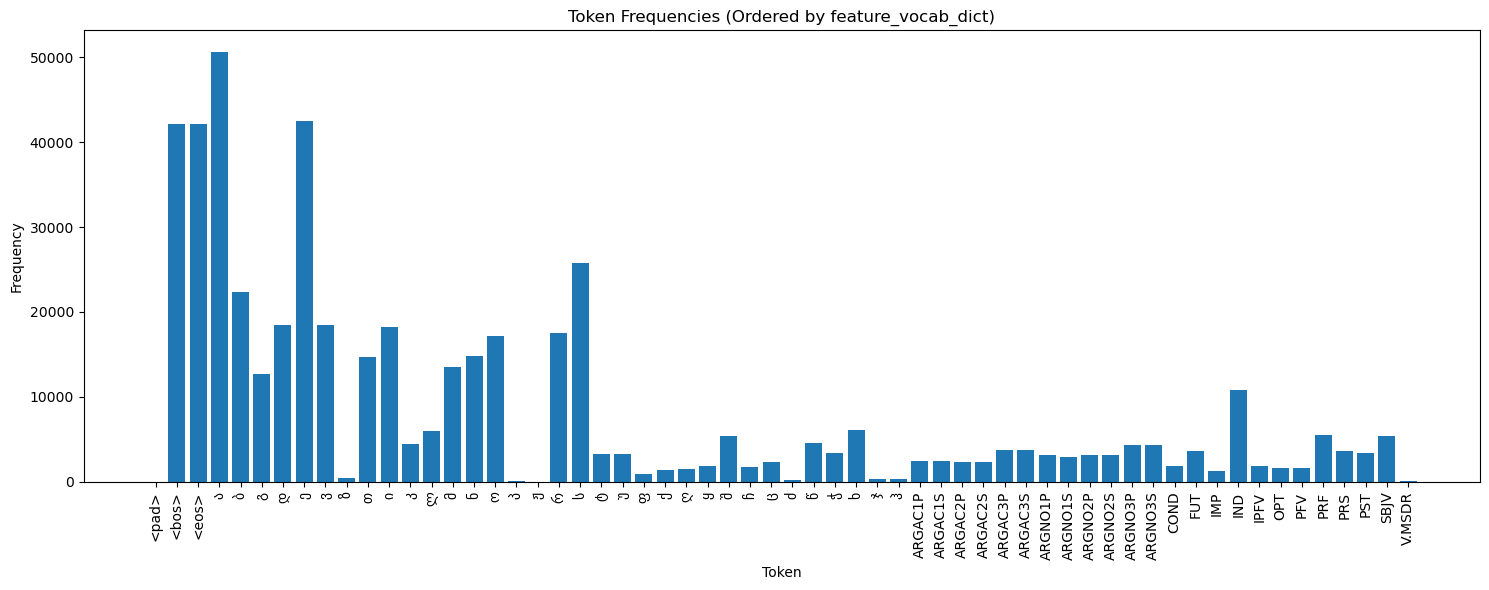

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

# Example: Suppose you have a list of all tokens in your dataset
all_tokens = [token for seq in um_features["tokens"] for token in seq]
all_tokens.extend([token for seq in um_target["tokens"] for token in seq])
# Count the frequency of each token
token_counts = Counter(all_tokens)

# Get token frequencies in the order of feature_vocab_dict
ordered_tokens = list(feature_vocab_dict.keys())
ordered_counts = [token_counts.get(token, 0) for token in ordered_tokens]

plt.figure(figsize=(15, 6))
plt.bar(ordered_tokens, ordered_counts)
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.title('Token Frequencies (Ordered by feature_vocab_dict)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [15]:
# save the tokenized data to a new csv file
um_features["tokens"].to_csv(r"..\data\tokens\um_features_tokenized.csv", index=False)
um_target["tokens"].to_csv(r"..\data\tokens\um_target_tokenized.csv", index=False)